# Домашнее задание 6

### Выполнил Штанько Константин, группа 4

Для начала нам необходимо получить таблицу c данными. Для начала обозначим `расшифровку` каждого столбца для понимания того, что мы анализируем. Давайте выведем ее на экран:

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


data = pd.read_excel('russian_regions.xlsx', sheet_name='Data')
desc = pd.read_excel('russian_regions.xlsx', sheet_name='Description of data')
print("Таблица 1. Описание данных")
print(desc.to_string(index=False))

Таблица 1. Описание данных
                      Переменная                                                                       Описание переменной
                 Q_OF_LIFE_INDEX                                                                    РЕЙТИНГ КАЧЕСТВА ЖИЗНИ
                  AVERAGE_INCOME                                     СРЕДНЕДУШЕВЫЕ ДЕНЕЖНЫЕ ДОХОДЫ НАСЕЛЕНИЯ В МЕС. (руб.)
                             GRP                                                              ВРП НА ДУШУ НАСЕЛЕНИЯ (руб.)
            POP_PER_HOSPITAL_BED                       ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ НА ОДНУ БОЛЬНИЧНУЮ КОЙКУ НА КОНЕЦ ГОДА (чел.)
                  POP_PER_DOCTOR                                                     ЧИСЛЕННОСТЬ НАСЕЛЕНИЯ НА ОДНОГО ВРАЧА
                   SICKNESS_RATE                                                   ЗАБОЛЕВАЕМОСТЬ (на 1000 чел. населения)
       ATMOSPHERIC_AIR_POLLUTION                             ВЫБРОСЫ ЗАГРЯЗНЯЮЩИХ ВЕЩЕСТВ В АТМОСФЕРНЫЙ ВОЗДУХ (

### **Задание 1:**

Выберем из общей таблицы те столбцы, с которыми мы будем работать:

In [33]:
df = data.select_dtypes(include=['number'])
df

,Q_OF_LIFE_INDEX,AVERAGE_INCOME,GRP,POP_PER_HOSPITAL_BED,POP_PER_DOCTOR,SICKNESS_RATE,ATMOSPHERIC_AIR_POLLUTION,DISCHARGE_OF_POLLUTED_WASTEWATER,UNEMPLOYMENT_RATE,EMPLOYMENT_RATE,LABOR_RATE,ENTERPRISES_NUM,ENTERPRISES_NUM_GROWTH_RATE,FEM_WAGE,MALE_WAGE,WAGE_GENDER_GAP,FEM_SHARE_IN_EMPLOYEES
0,64.149,30778,506420.9,138.5,247.1,709.9,175,0.299145,4.9,0.225714,0.240952,33992.24750,1.137930,31105.842284,39966.872605,77.829063,52.25989
1,49.343,26585,253100.4,132.0,246.9,767.4,40,0.600000,4.0,0.236190,0.248571,18703.37125,0.880532,25282.041814,33424.005888,75.640370,55.08514
2,50.967,23539,300273.6,119.9,286.4,919.2,42,0.811475,5.6,0.291905,0.300952,30494.11625,0.902246,30105.172162,39248.843377,76.703336,57.19788
3,59.327,30289,370610.4,121.9,191.4,526.6,104,0.319892,4.3,0.284762,0.289524,51627.62375,0.924481,31127.016566,41131.373061,75.677067,54.69041
4,47.754,24503,182398.1,122.0,226.0,902.5,22,0.487805,5.4,0.274286,0.296190,29030.24625,1.002322,24944.968012,31452.071954,79.311048,62.41403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,39.650,30937,332533.2,104.5,181.7,852.9,113,0.943662,6.0,0.327619,0.358571,15085.49375,1.092044,42265.904622,66846.650664,63.228156,46.95234
77,44.517,59774,1088347.4,84.3,156.8,657.6,29,0.130952,5.6,0.369048,0.448571,4287.75000,0.591495,74167.720029,89531.921709,82.839415,45.96691
78,52.643,53783,1577910.3,87.9,172.2,755.0,85,0.165563,5.5,0.416190,0.411905,15407.99250,0.943944,71632.502461,105064.551075,68.179516,48.24797
79,28.940,24696,322720.4,82.6,276.2,657.2,19,0.733333,6.3,0.276667,0.321429,2804.37500,0.892545,32697.059710,46301.964954,70.617002,56.09032


`Cтандартизируем` данные:

In [34]:
scaler = StandardScaler()
df1 = scaler.fit_transform(df)

Построим `K-Means` с гиперпараметром `K=3` и получим силуэтный коэффициент для оценки кластеризации:

In [35]:
from sklearn.metrics import silhouette_score


df2 = pd.DataFrame(df1, columns=df.columns, index=df.index)
cl = KMeans(n_clusters=3, n_init=10, random_state=1)
clusters = cl.fit_predict(df2)
df2['Cluster'] = clusters + 1
cluster_means = df2.groupby('Cluster').mean().reset_index()
silhouette2 = np.round(silhouette_score(df2, df2['Cluster']), 2)
print(f'Силуэтный коэффициент: {float(silhouette2)}')


df2['Cluster'].value_counts()
df2.to_excel('filik.xlsx')

Силуэтный коэффициент: 0.37


Выделим столбец кластеров в отдельную переменную, после этого `разделим выборку на тестовую и обучающуюся` **(70/30)** и обучим модель LDA из `2 компонент` для того, чтобы разделить данные на 3 кластера:

In [45]:
X = df2.drop('Cluster', axis=1)
y = df2['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

lda = LinearDiscriminantAnalysis(n_components=2)
model = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

Модель обучена на тренировочной выборке. Теперь `построим графики по осям LD1 и LD2` и посмотрим, насколько кластеры линейно разделимы:

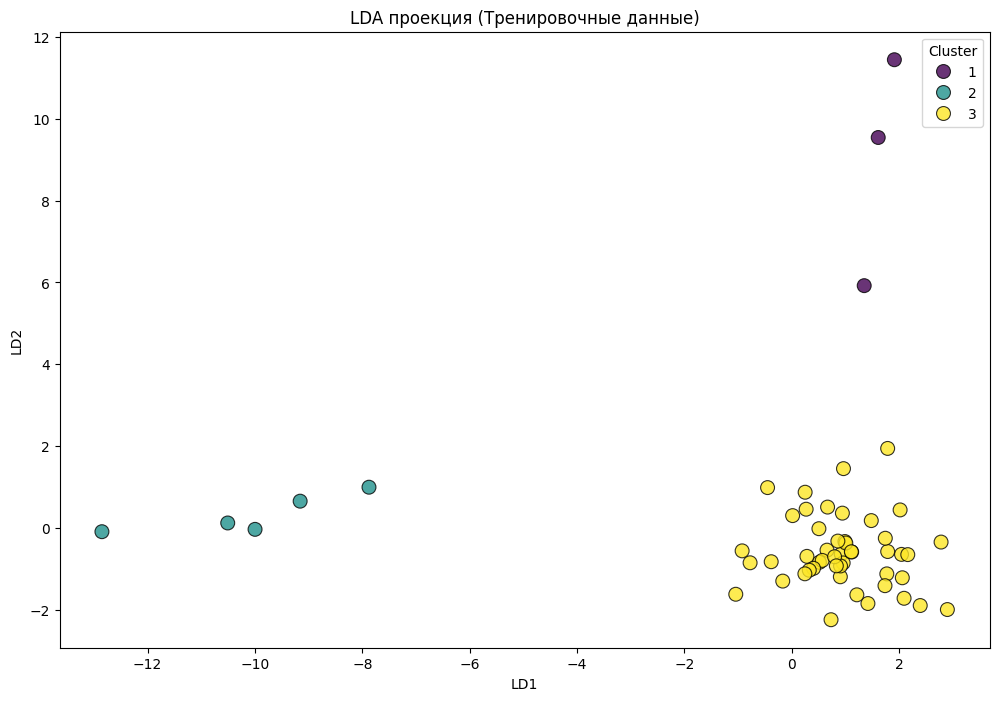

In [44]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=model[:, 0], 
    y=model[:, 1], 
    hue=y_train,
    palette='viridis',
    s=100,
    alpha=0.8,
    edgecolor='k'
)
plt.title('LDA проекция (Тренировочные данные)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title='Cluster')
plt.show()


Заметим, что LD1 хорошо `отделяет 2-й кластер от 1 и 3`, а `1-й кластер хорошо отделяется от остальных по LD2`.

Теперь проделаем то же самое на `тестовой выборке`:

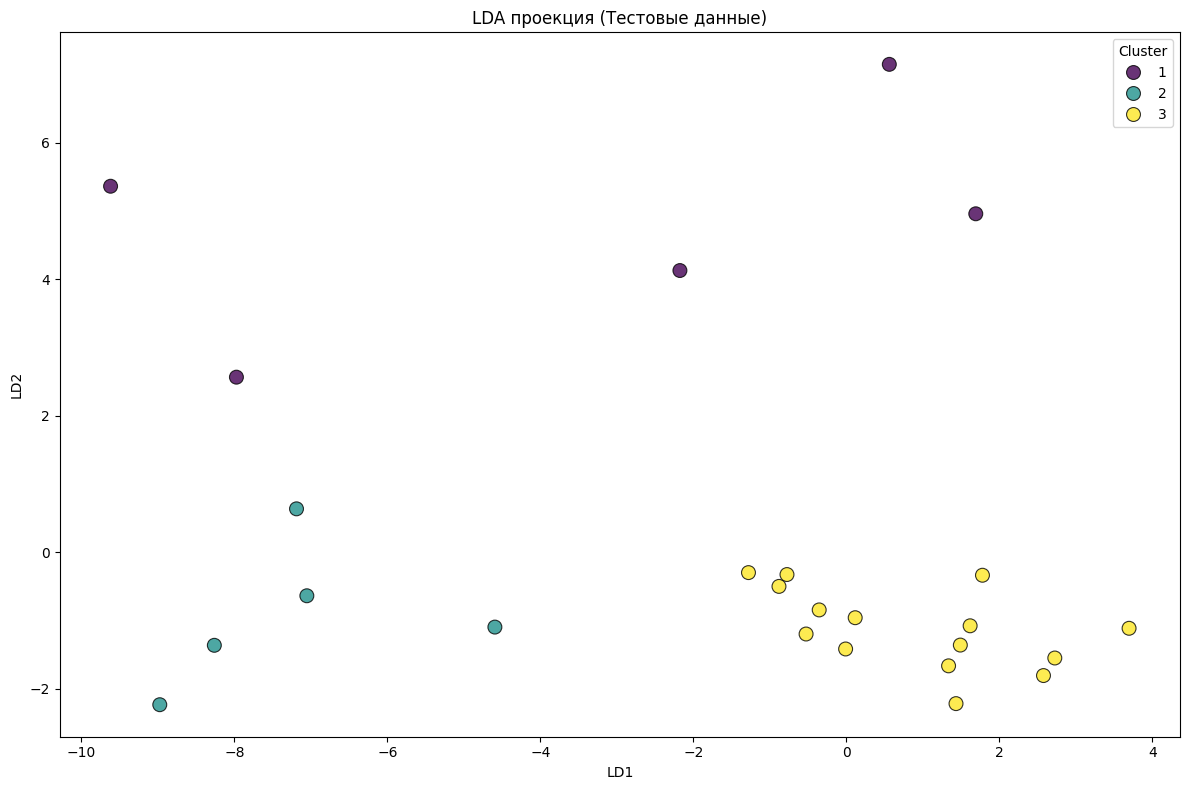

In [48]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=X_test_lda[:, 0], 
    y=X_test_lda[:, 1], 
    hue=y_test,
    palette='viridis',
    s=100,
    alpha=0.8,
    edgecolor='k',
)
plt.title('LDA проекция (Тестовые данные)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

Видно, что модель смогла найти зависимости, которые причисляют наблюдения к определенным кластерам, однако **наблюдаются ошибки**. Можно заметить, что `наблюдения, которые отнеслись к 1 кластеру, не разделяются с помощью LD1` (LD1 отделяет 2 кластер от 3), хотя на тренировочной выборке можно было заметить разделимость. Однако по оси LD2 все еще `можно наблюдать отделимость кластеров 1 и 2-3`.

Теперь с помощью коэффициентов LDA `выделим наиболее важные признаки` **(данные стандартизованы)**:

In [52]:
lda_coef = pd.DataFrame(
    lda.scalings_,
    index=X.columns,
    columns=[f'LD{i+1}' for i in range(lda.scalings_.shape[1])])
lda_coef

,LD1,LD2
Q_OF_LIFE_INDEX,0.094470,0.065142
AVERAGE_INCOME,0.214970,-0.166469
GRP,-2.801109,0.943336
POP_PER_HOSPITAL_BED,0.467691,-0.091847
POP_PER_DOCTOR,0.220091,-0.320408
SICKNESS_RATE,0.393161,0.256028
ATMOSPHERIC_AIR_POLLUTION,0.073690,-0.251517
DISCHARGE_OF_POLLUTED_WASTEWATER,-0.106702,0.128959
UNEMPLOYMENT_RATE,-1.144124,0.149357
EMPLOYMENT_RATE,-0.143004,-0.911728


Можно заметить, что `LD1 выделяет зарплаты и уровень ВВП как одни из самых важных признаков для разделения`. 
Таким образом, чем больше какой-то из этих признаков, тем левее будет точка по LD1 (так как веса отрицательные в случае MALE_WAGE, GRP) или правее (FEM_WAGE). 
Для `LD2 же самыми важными признаки являются также зарплаты, уровень ВВП`. 

То есть, **LD2 корректирует результаты LD1 для того, чтобы создать разделимость на 3 кластера, чего не может сделать один линейный дискриминант**.

`Предскажем кластеры` для тестовой выборки и построим `матрицу ошибок` и проинтерпретируем ее:

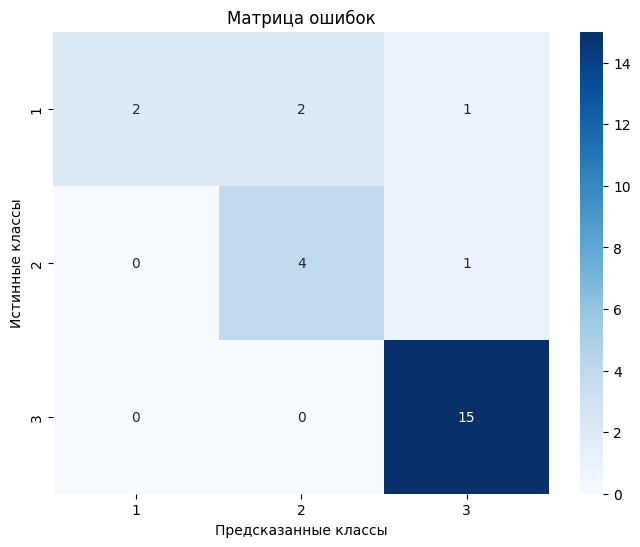

In [56]:
y_pred = lda.predict(X_test)
plt.figure(figsize=(8,6))
sns.heatmap(
    confusion_matrix(y_test, y_pred), 
    annot=True, 
    fmt='d',
    cmap='Blues',
    xticklabels=lda.classes_,
    yticklabels=lda.classes_
)
plt.title('Матрица ошибок')
plt.ylabel('Истинные классы')
plt.xlabel('Предсказанные классы')
plt.show()

Так как кластер 3 самый многочисленный (выборка не стратифицирована по классам в силу небольшого количества наблюдений), то `LDA наиболее уверенно отделяет кластер 3 от всех остальных` - это можно заметить по матрице ошибок (на 3-м кластере наблюдается 0 ошибок). 
`Кластер 1 модель определяет плохо`, на ней она больше ошибается, чем выдает правдивые результаты (отношение неправильных к правильным: 3:2).
Если же говорить про `кластер 2, то здесь модель определяет кластер верно в 80% случаев`.

В целом, это неплохой результат для линейного анализа.

Построим на `долю объясненной дисперсии` линейными дискриминантами:

In [54]:
explained_variance = lda.explained_variance_ratio_
print(f"\nОбъясненная дисперсия компонентами:")
print(f"LD1: {explained_variance[0]:.2%}")
print(f"LD2: {explained_variance[1]:.2%}")


Объясненная дисперсия компонентами:
LD1: 68.35%
LD2: 31.65%


То есть, `LD1 содержит основную информацию, как делить на кластеры, а LD2 дополняет модель, корректирует.`